In [17]:
from skimage.io import imread
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
image_dir = "images"
label_dir = "labels"

image_names = listdir(image_dir)
paths = [
    (Path(image_dir, image_name), Path(label_dir, image_name))
    for image_name in image_names
]

In [72]:
all_normal_pixels = []
all_loss_pixels = []

for image_path, label_path in paths:
    image = imread(image_path)
    label = imread(label_path)

    normal_mask = label == 0
    loss_mask = label == 1

    # Pixels have 4 bands, so their shape is (x, 4)
    normal_pixels = image[normal_mask]
    loss_pixels = image[loss_mask]

    all_normal_pixels.extend(normal_pixels)
    all_loss_pixels.extend(loss_pixels)

all_normal_pixels = np.array(all_normal_pixels)
all_loss_pixels = np.array(all_loss_pixels)

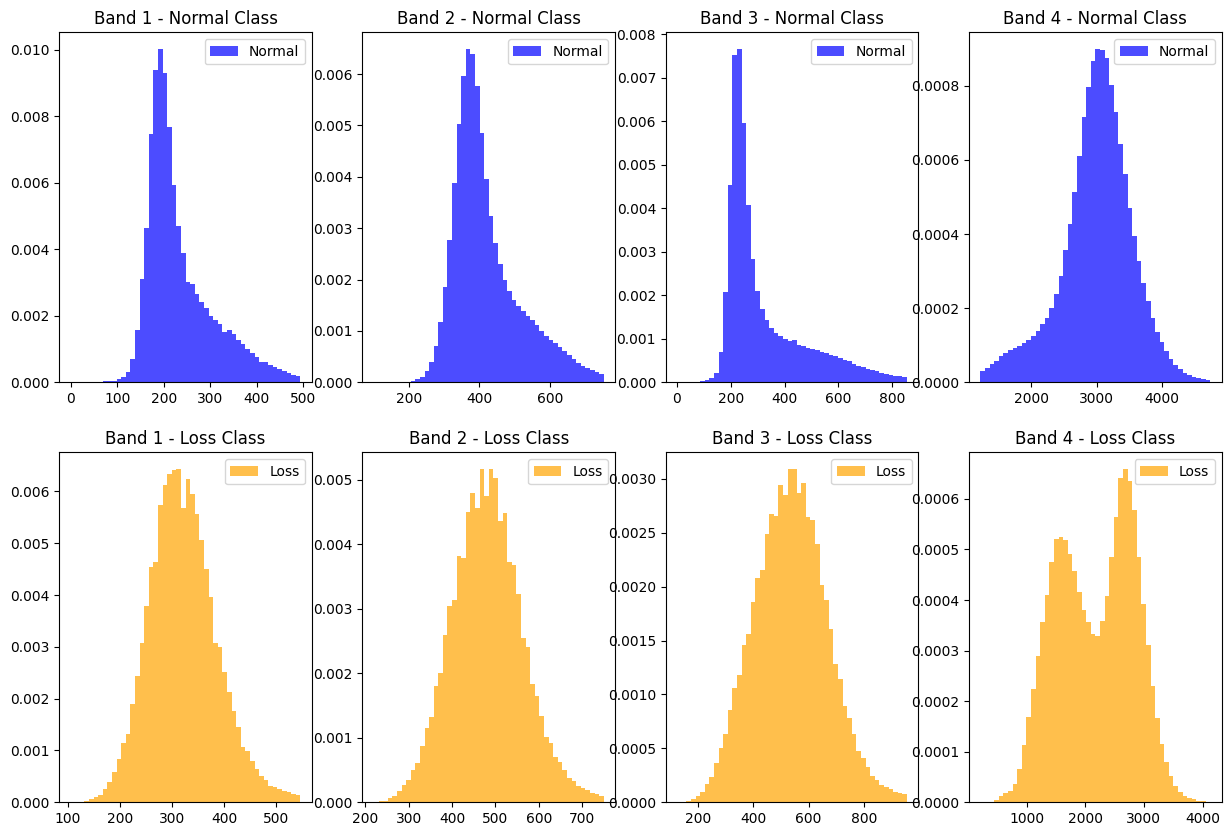

In [85]:
from scipy.stats import zscore

z_threshold = 3
def remove_outliers(data):
    return data[np.abs(zscore(data)) < z_threshold]

num_bands = 4
plt.figure(figsize=(15, 10))
for band in range(num_bands):
    plt.subplot(2, num_bands, band + 1)
    normal_pixels_no_outliers = remove_outliers(all_normal_pixels[:, band])
    plt.hist(normal_pixels_no_outliers, bins=50,
             color='blue', alpha=0.7, label='Normal', density=True)
    plt.title(f"Band {band + 1} - Normal Class")
    plt.legend()

    plt.subplot(2, num_bands, num_bands + band + 1)
    loss_pixels_no_outliers = remove_outliers(all_loss_pixels[:, band])
    plt.hist(loss_pixels_no_outliers, bins=50,
             color='orange', alpha=0.7, label='Loss', density=True)
    plt.title(f"Band {band + 1} - Loss Class")
    plt.legend()

plt.show()